In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Visualize the image

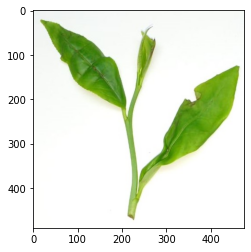

In [3]:
img = cv2.imread('./Data/test_image_1.jpg')

img = plt.imread('./Data/test_image_1.jpg')
plt.imshow( img)



In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv, (36, 25, 25), (70, 255,255))
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

In [6]:
cv2.imshow('green', green)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Visualize RGB Channels

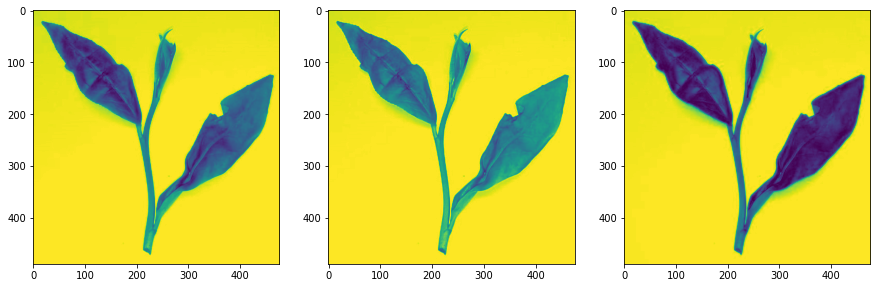

In [10]:
image = cv2.imread('./Data/test_image_1.jpg')
img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# RGB channel
R = img_rgb[:,:,0]
G = img_rgb[:,:,1]
B = img_rgb[:,:,2]
fig, ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(R)
ax[1].imshow(G)
ax[2].imshow(B)

## Segmentation

In [20]:
pixel_vals = R.flatten()
pixel_vals = np.float32(pixel_vals)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0 )

# https://docs.opencv.org/4.5.2/d1/d5c/tutorial_py_kmeans_opencv.html
K = 2
retval, labels, centers = cv2.kmeans(pixel_vals, K, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)

print(centers)

[[104]
 [252]]


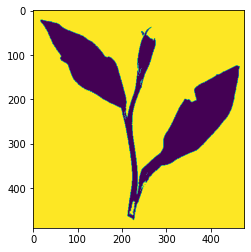

In [23]:
# Segmenation
segmented_data = centers[labels.flatten()]
segmented_image = segmented_data.reshape((B.shape))
pixel_labels = labels.reshape(img_rgb.shape[0], img_rgb.shape[1])

# displaying segmented image
plt.imshow(segmented_image)

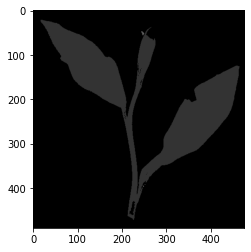

In [15]:
pixel_labels = np.uint8(pixel_labels)
ret, components = cv2.connectedComponents(pixel_labels, connectivity=8)
plt.imshow(components, cmap='gray')

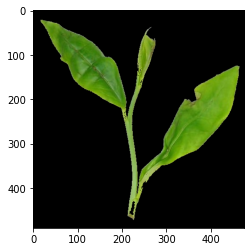

In [16]:
#  to extract only the foreground cluster
indices = []
for i in range(1,ret):
    row, col = np.where(components == i)
    indices.append(max(len(row), len(col)))

component = np.argmax(np.array(indices))
main_component = component+1 

# create a mask to extract pixels corresponding to cluster to which leaf belongs
mask = np.where(components==main_component, 1, 0)
B = image[:,:,0]
G = image[:,:,1]
R = image[:,:,2]

# extract only masked pixels
r = R*mask
g = G*mask
b = B*mask

final_img = np.dstack((r,g,b))
plt.imshow(final_img)


## Augmentation

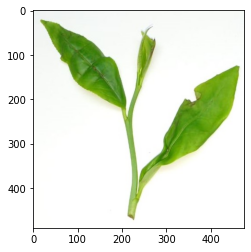

In [5]:
x = plt.imread('./Data/test_image_1.jpg')
plt.imshow(x)
plt.show()

In [6]:
import albumentations as alb
aug_constructor = alb.HorizontalFlip(p=1.0)
augmented_img = aug_constructor(image = x)
print(augmented_img)

{'image': array([[[245, 250, 246],
        [245, 250, 246],
        [245, 250, 246],
        ...,
        [238, 242, 241],
        [238, 242, 241],
        [238, 242, 241]],

       [[245, 250, 246],
        [245, 250, 246],
        [245, 250, 246],
        ...,
        [238, 242, 241],
        [238, 242, 241],
        [238, 242, 241]],

       [[245, 250, 246],
        [245, 250, 246],
        [245, 250, 246],
        ...,
        [238, 242, 241],
        [238, 242, 241],
        [238, 242, 241]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 255, 253]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 253],
        [255, 255, 253],
        [255, 

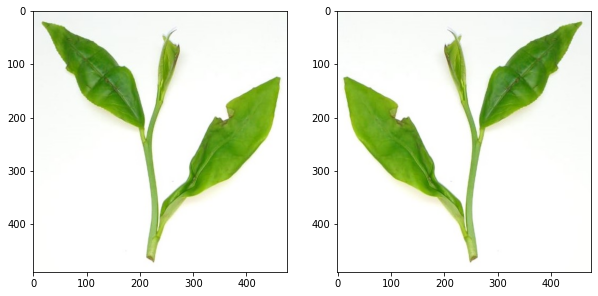

In [14]:
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].imshow(x)
ax[1].imshow(augmented_img['image'])
plt.show()

In [44]:
def plot_augmented_img(title = ""):
    fig, ax = plt.subplots(1,2, figsize = (8,8))
    ax[0].imshow(x)
    ax[1].imshow(augmented_img['image'])
    plt.title(title)
    plt.show()

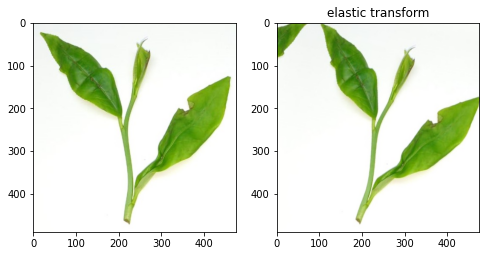

In [45]:
aug_constructor = alb.ElasticTransform(p=1, alpha=0.34, sigma=120*0.05, alpha_affine=68.46)
augmented_img = aug_constructor(image=x)
plot_augmented_img("elastic transform")

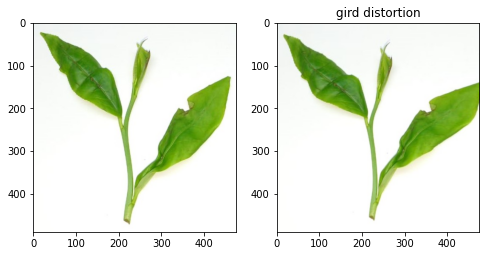

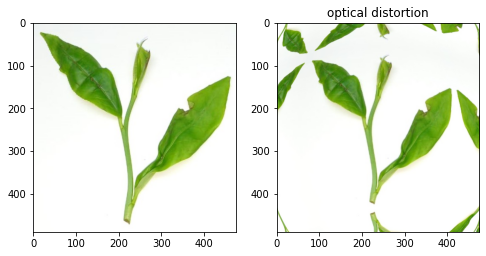

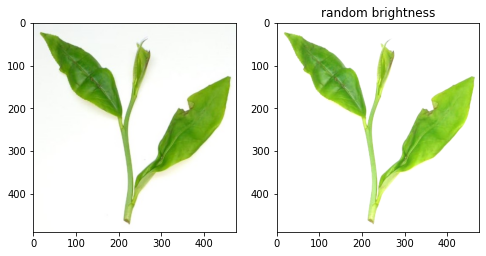

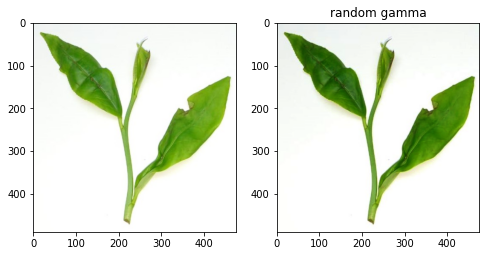

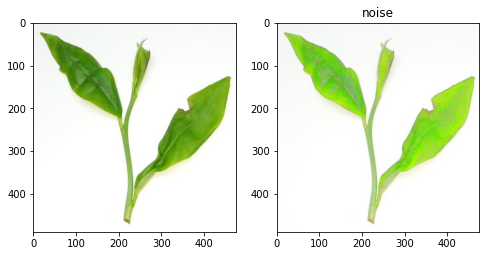

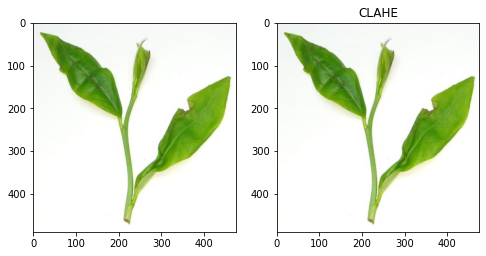

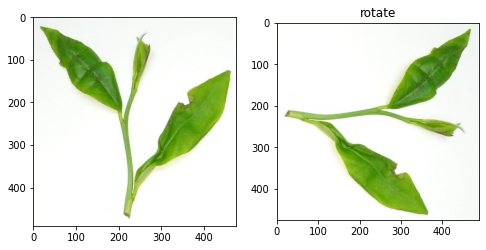

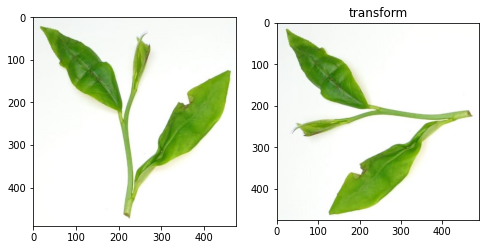

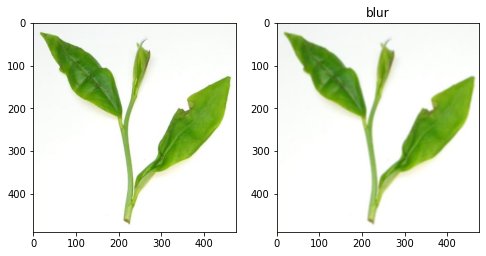

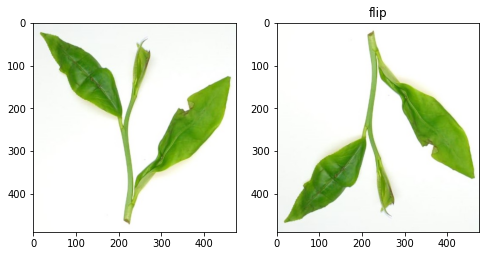

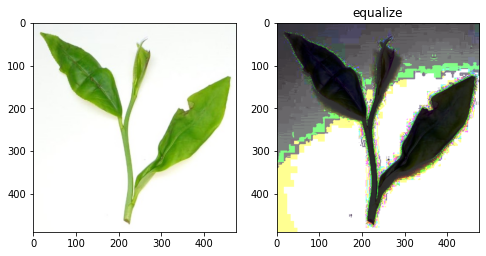

In [46]:
aug_constructor = alb.GridDistortion(p=1)
augmented_img = aug_constructor(image=x)
plot_augmented_img("gird distortion")


aug_constructor = alb.OpticalDistortion(p=1, distort_limit=2, shift_limit=0.5)
augmented_img = aug_constructor(image=x)
plot_augmented_img("optical distortion")


aug_constructor = alb.RandomBrightnessContrast(p=1, brightness_limit=[-0.06, 0.1], contrast_limit=[-0.21, 0.2])
augmented_img = aug_constructor(image=x)
plot_augmented_img("random brightness")          
        

aug_constructor = alb.RandomGamma(p=1, gamma_limit=[80, 150])
augmented_img = aug_constructor(image=x)
plot_augmented_img("random gamma")          
        

aug_constructor = alb.ISONoise(p=1, intensity=[0.36, 1])
augmented_img = aug_constructor(image=x)
plot_augmented_img("noise")         
        

aug_constructor = alb.CLAHE()
augmented_img = aug_constructor(image=x)
plot_augmented_img("CLAHE")          
        

aug_constructor = alb.RandomRotate90(p=1)
augmented_img = aug_constructor(image=x)
plot_augmented_img("rotate")           
        

aug_constructor = alb.Transpose(p=1)
augmented_img = aug_constructor(image=x)
plot_augmented_img("transform")          

aug_constructor = alb.Blur(p=1, blur_limit=[3, 6])
augmented_img = aug_constructor(image=x)
plot_augmented_img("blur")          
        

aug_constructor = alb.Flip(p=1)
augmented_img = aug_constructor(image=x)
plot_augmented_img("flip")          


aug_constructor = alb.Equalize(p=1)
augmented_img = aug_constructor(image=x)
plot_augmented_img("equalize")         


## Multiple augmentation at once

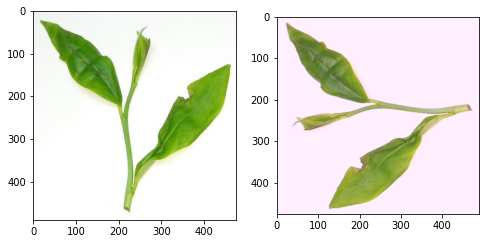

In [56]:
multi_augmentation = alb.Compose([alb.Transpose(p=0.5),
                                  alb.Flip(p=0.5),
                                  alb.OneOf([alb.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3),
                                             alb.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1)],p=1),
                                  alb.GaussianBlur(p=0.05),
                                  alb.HueSaturationValue(p=0.5),
                                  alb.RGBShift(p=0.5)
                                 ])

augmented_img = multi_augmentation(image=x)
plot_augmented_img("")  